### Student Performance Indicator

Life Cycle of ML Project

1) Understanding the problem
2) Data Collection
3) Data Checks to Perform
4) Exploratory Data Analysis
5) Data Pre-Processing 
6) Model Training
7) Choose the model

### Problem Statement:
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Collection:
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 The data consists of 8 column and 1000 rows.

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('data/StudentsPerformance.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Checks to perform:

1) Check missing values 
2) Check Duplicates
3) Check Datatype
4) Check the number of unique values of each column
5) Check statistics on data
6) Check various categories present in different categorical column


In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# Checking the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
# check statistics on this data 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### EDA

In [15]:
numeric_features = [f for f in df.columns if df[f].dtype != 'O']
categorical_features = [f for f in df.columns if df[f].dtype == 'O']
print(numeric_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
# printing unique values in the categorical data

for f in categorical_features:
    print(f"Categories in {f} variable: ",end = " ")
    print(df[f].unique())
    print()

Categories in gender variable:  ['female' 'male']

Categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable:  ['standard' 'free/reduced']

Categories in test preparation course variable:  ['none' 'completed']



In [18]:
# Adding columns for "Total Score" and "Avg Score"

df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average_Score'] = df['Total_Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
no_of_students_score_math = df[df['math score'] == 100]['Average_Score'].count()
no_of_students_score_writing = df[df['writing score'] == 100]['Average_Score'].count()
no_of_students_score_reading = df[df['reading score'] == 100]['Average_Score'].count()

print("The number of students getting highest marks in maths: ",no_of_students_score_math)
print("The number of students getting highest marks in writing: ",no_of_students_score_writing)
print("The number of students getting highest marks in reading: ",no_of_students_score_reading)
print()

no_of_students_score_math_50 = df[df['math score'] <= 50]['Average_Score'].count()
no_of_students_score_writing_50 = df[df['writing score'] <= 50]['Average_Score'].count()
no_of_students_score_reading_50 = df[df['reading score'] <= 50]['Average_Score'].count()

print("The number of students getting highest marks in maths: ",no_of_students_score_math_50)
print("The number of students getting highest marks in writing: ",no_of_students_score_writing_50)
print("The number of students getting highest marks in reading: ",no_of_students_score_reading_50)

The number of students getting highest marks in maths:  7
The number of students getting highest marks in writing:  14
The number of students getting highest marks in reading:  17

The number of students getting highest marks in maths:  150
The number of students getting highest marks in writing:  124
The number of students getting highest marks in reading:  97


### Insights:
From the above values we can notice that students struggle to score in math.

### EDA (Visualization)

<Axes: xlabel='Average_Score', ylabel='Count'>

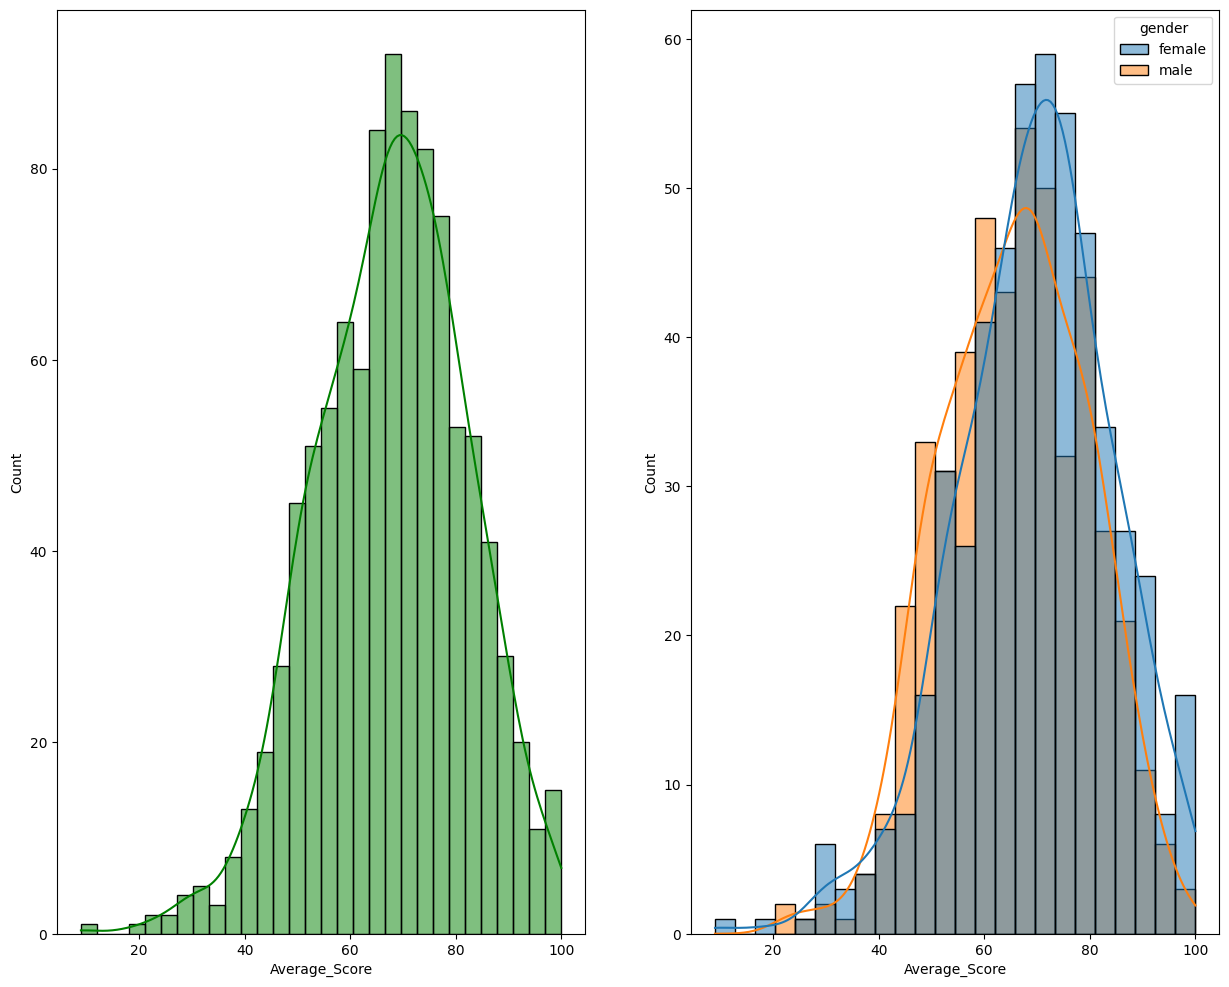

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15,12))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average_Score',kde=True,hue='gender')

Female students perform well as compare to male students

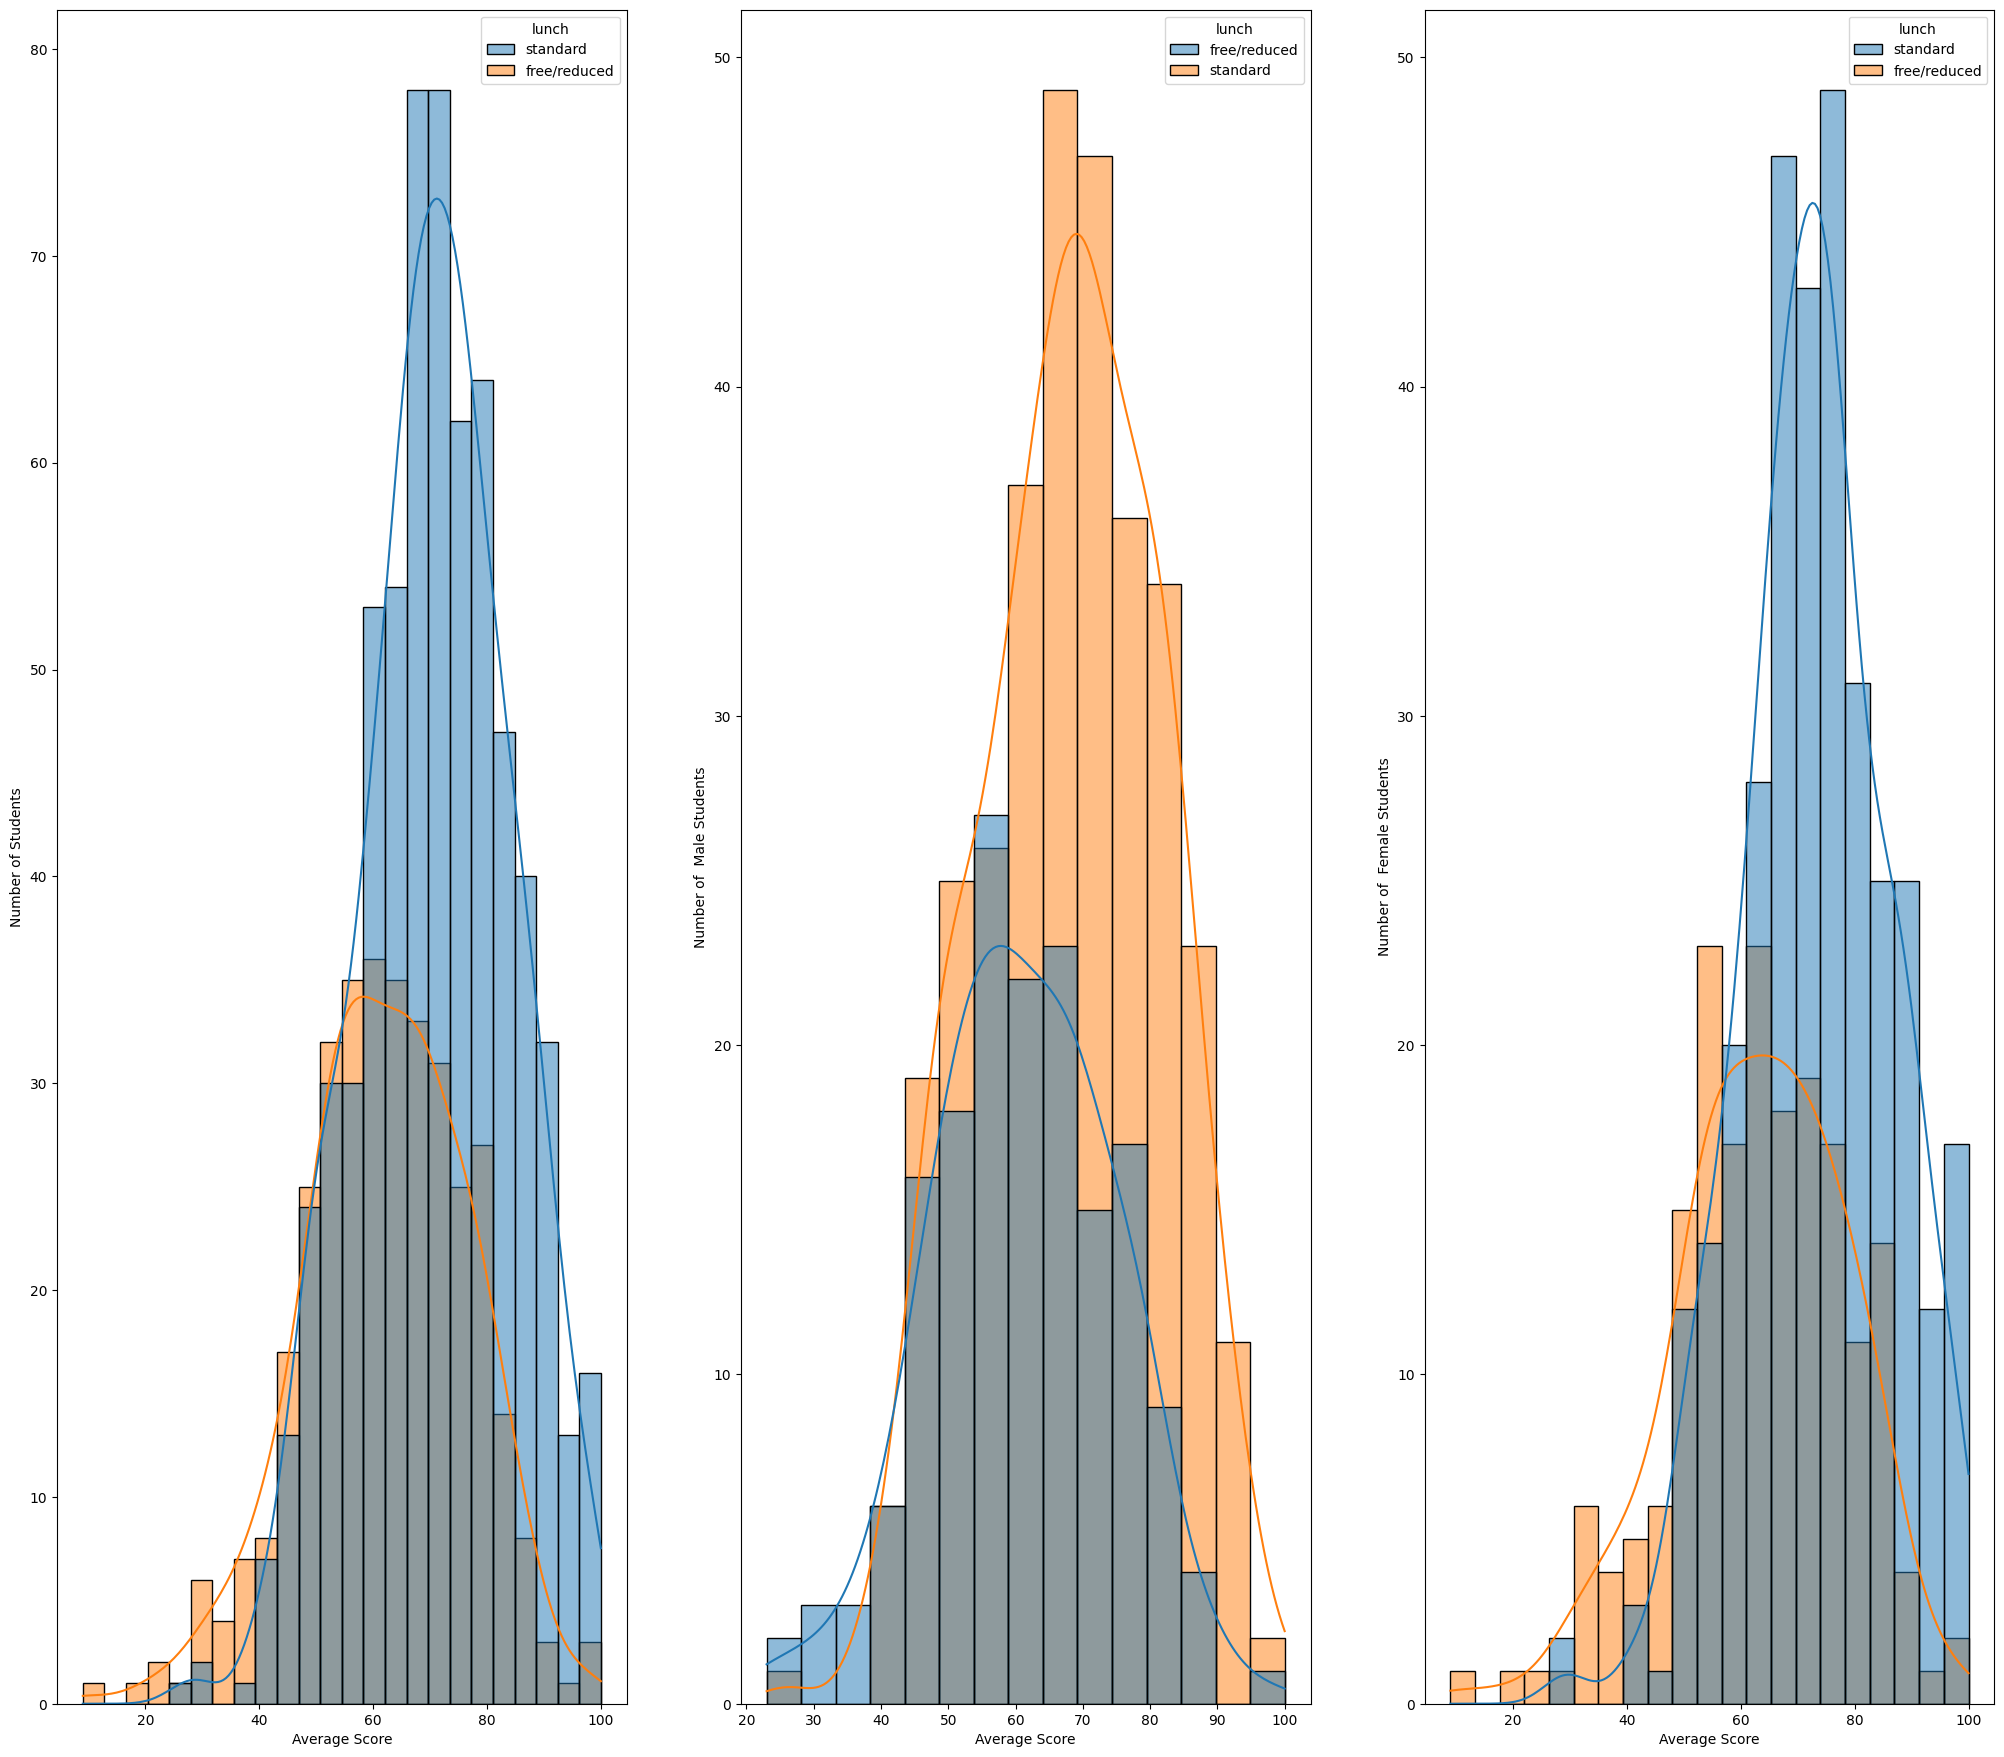

In [36]:
# Effect of lunch on students 
fig, axs = plt.subplots(1,3,figsize=(25,22))

plt.subplot(1,3,1)
sns.histplot(data=df,x='Average_Score',hue='lunch',kde=True)
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Number of Students')

plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'],x='Average_Score',hue='lunch',kde=True)
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Number of  Male Students')

plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'],x='Average_Score',hue='lunch',kde=True)
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Number of  Female Students')
plt.show()



So standard lunch with proper nutrients and protein does impact the performance of students

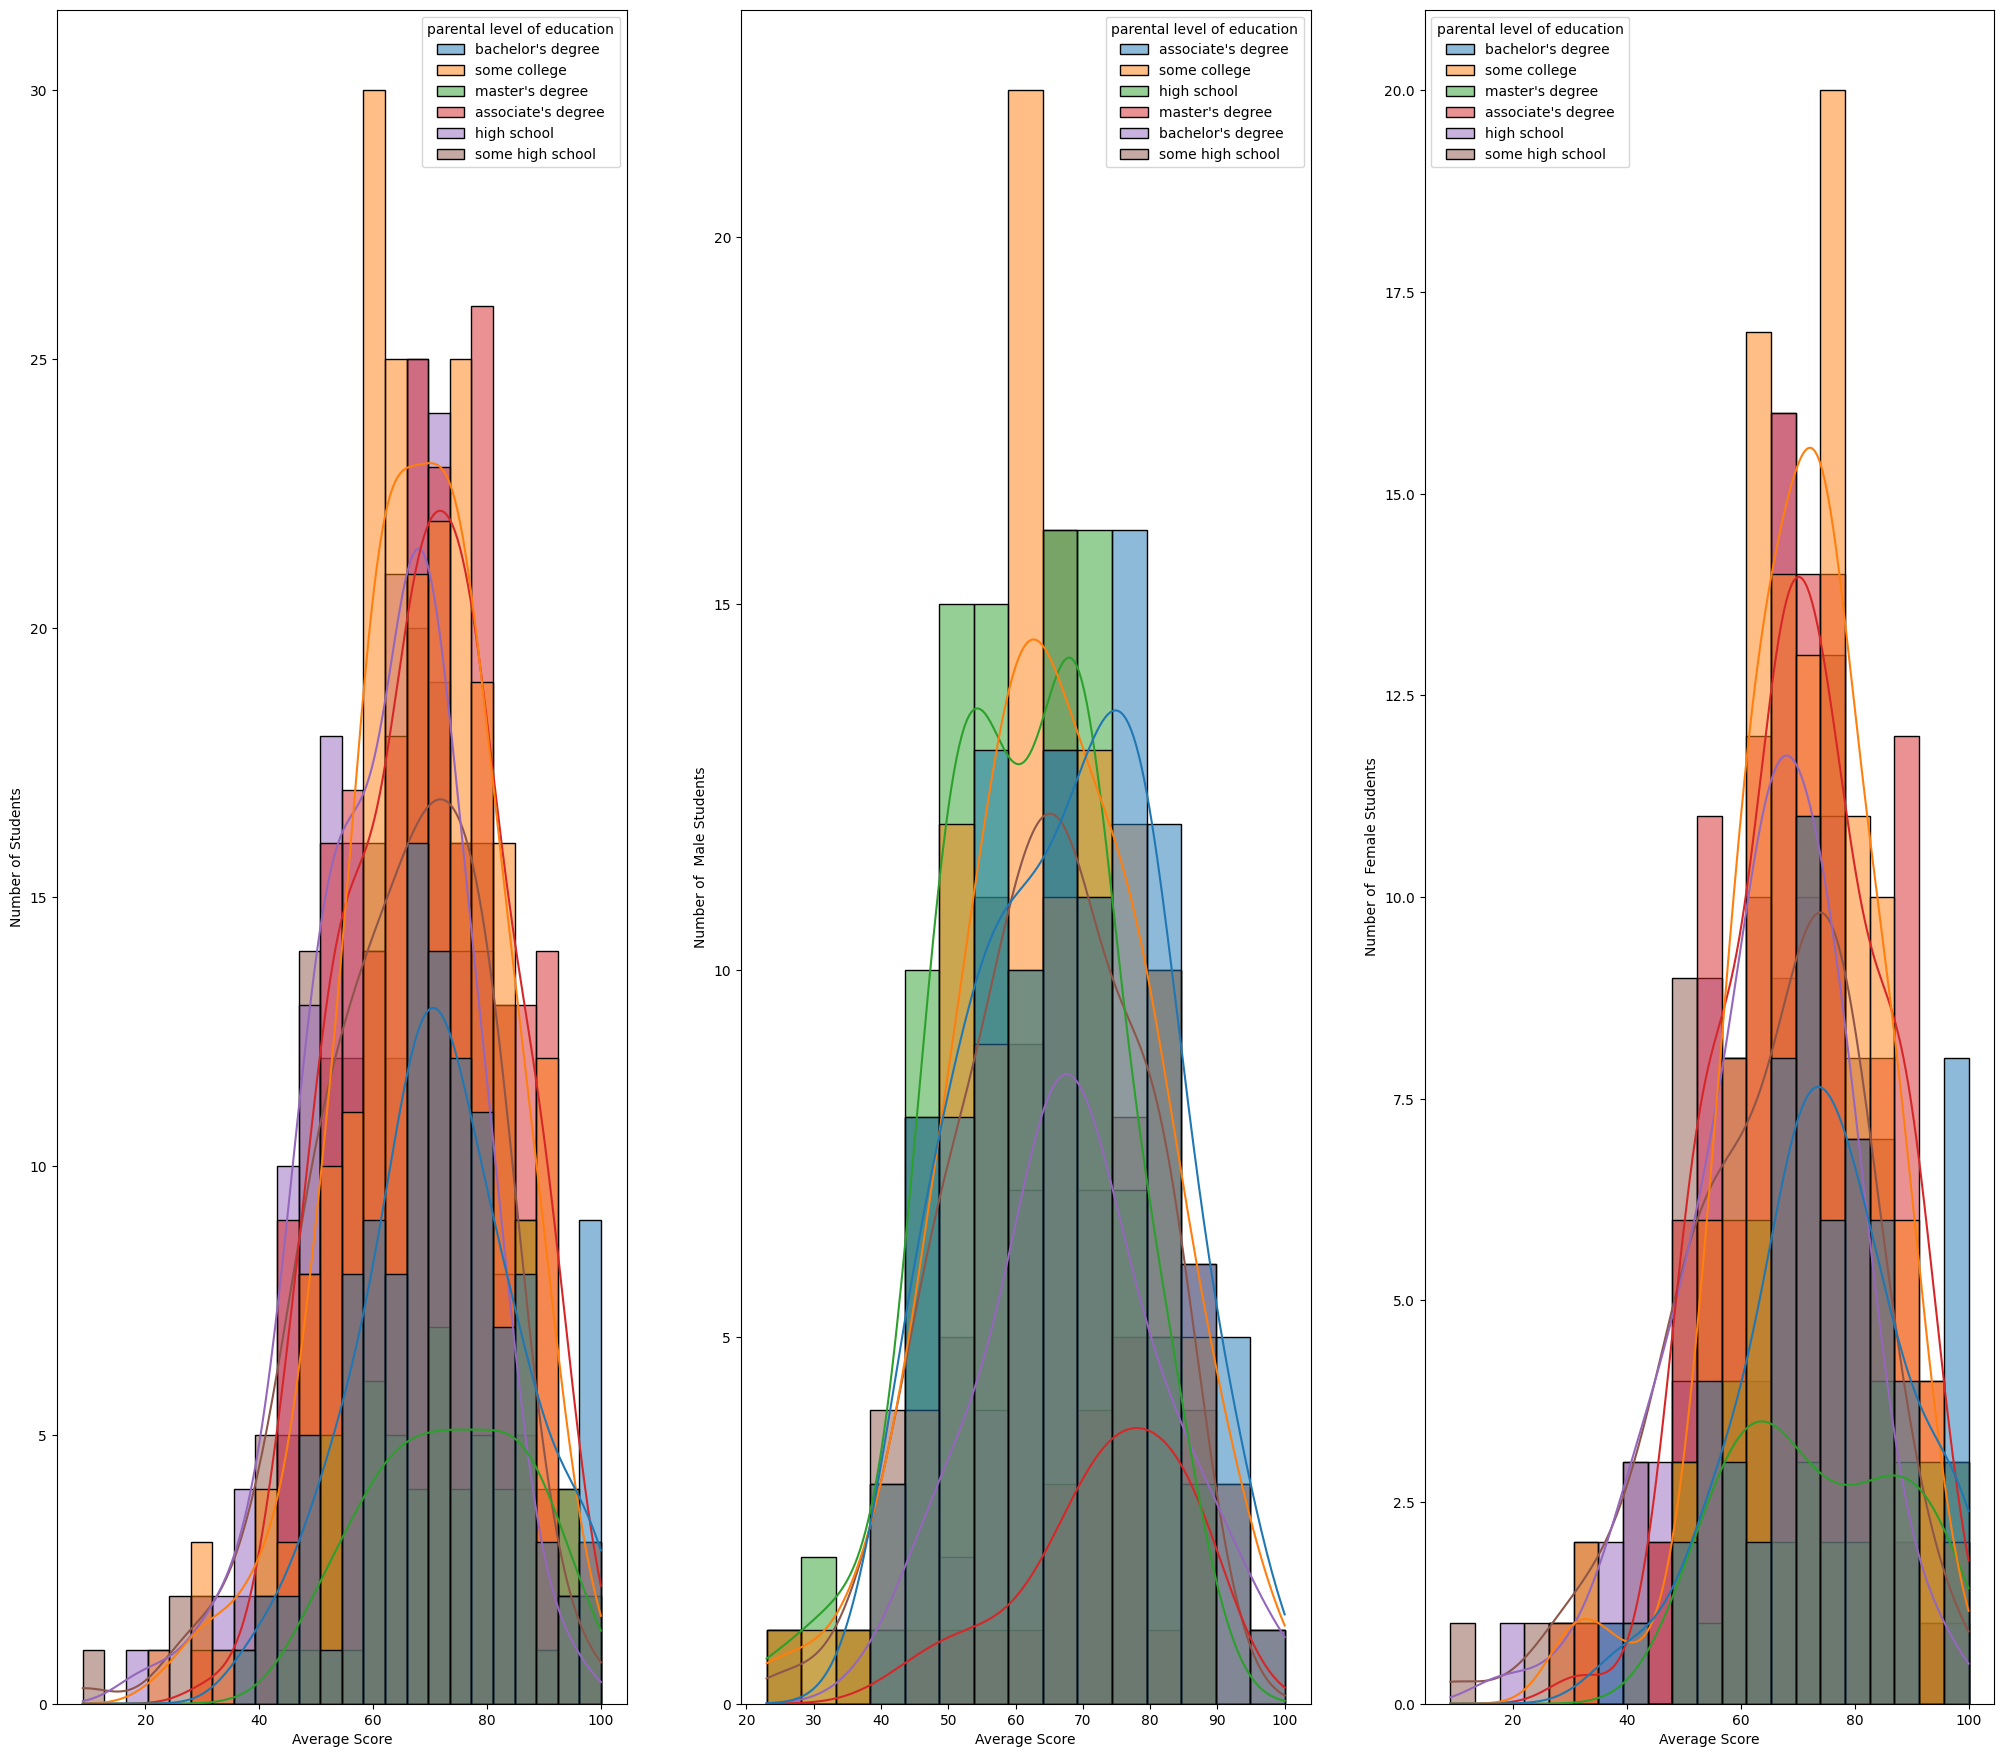

In [37]:
# Effect of Parents Education on Students
fig, axs = plt.subplots(1,3,figsize=(25,22))

plt.subplot(1,3,1)
sns.histplot(data=df,x='Average_Score',hue='parental level of education',kde=True)
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Number of Students')

plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'],x='Average_Score',hue='parental level of education',kde=True)
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Number of  Male Students')

plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'],x='Average_Score',hue='parental level of education',kde=True)
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Number of  Female Students')
plt.show()



Not much conclusion can be formed here

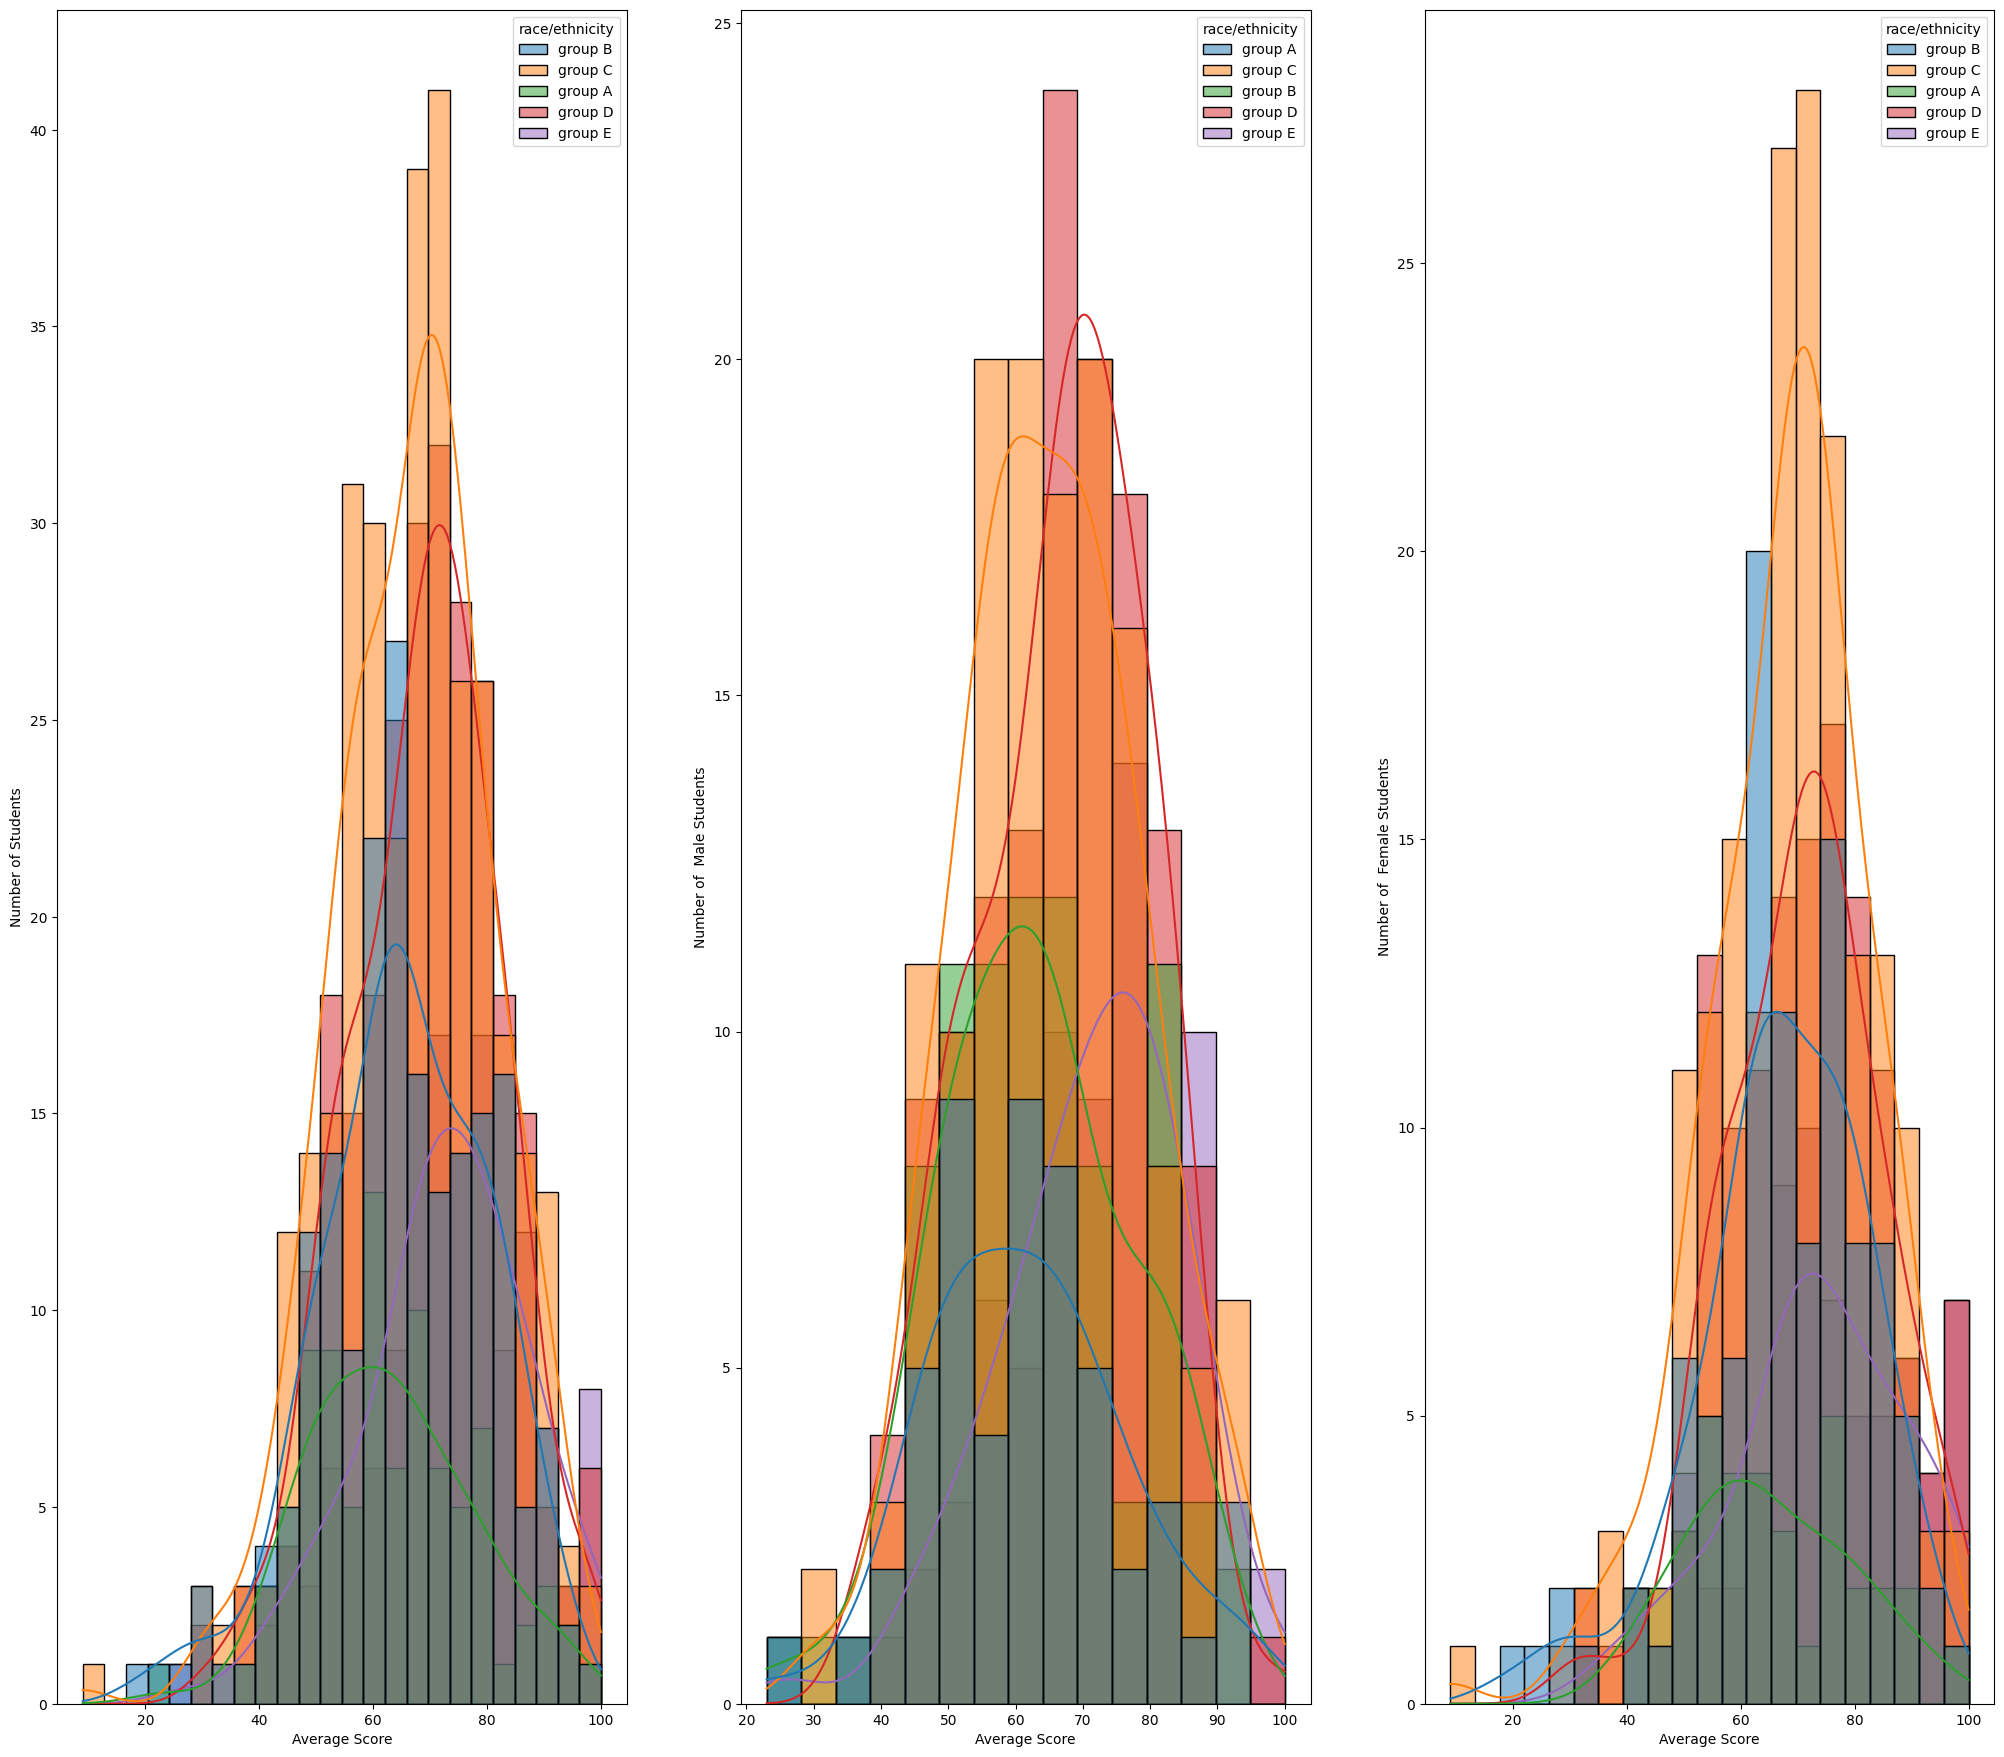

In [38]:
# Effect of Parents Education on Students
fig, axs = plt.subplots(1,3,figsize=(25,22))

plt.subplot(1,3,1)
sns.histplot(data=df,x='Average_Score',hue='race/ethnicity',kde=True)
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Number of Students')

plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'],x='Average_Score',hue='race/ethnicity',kde=True)
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Number of  Male Students')

plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'],x='Average_Score',hue='race/ethnicity',kde=True)
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Number of  Female Students')
plt.show()



Group A, B students do not seem to perform well.

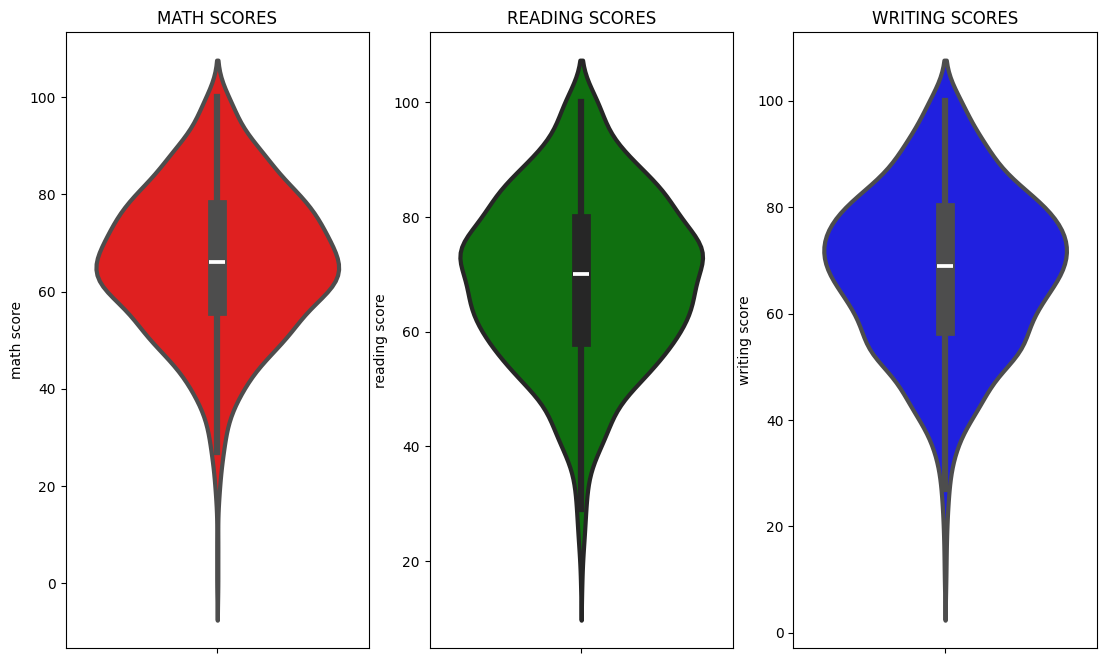

In [39]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### MultiVariate Analysis 

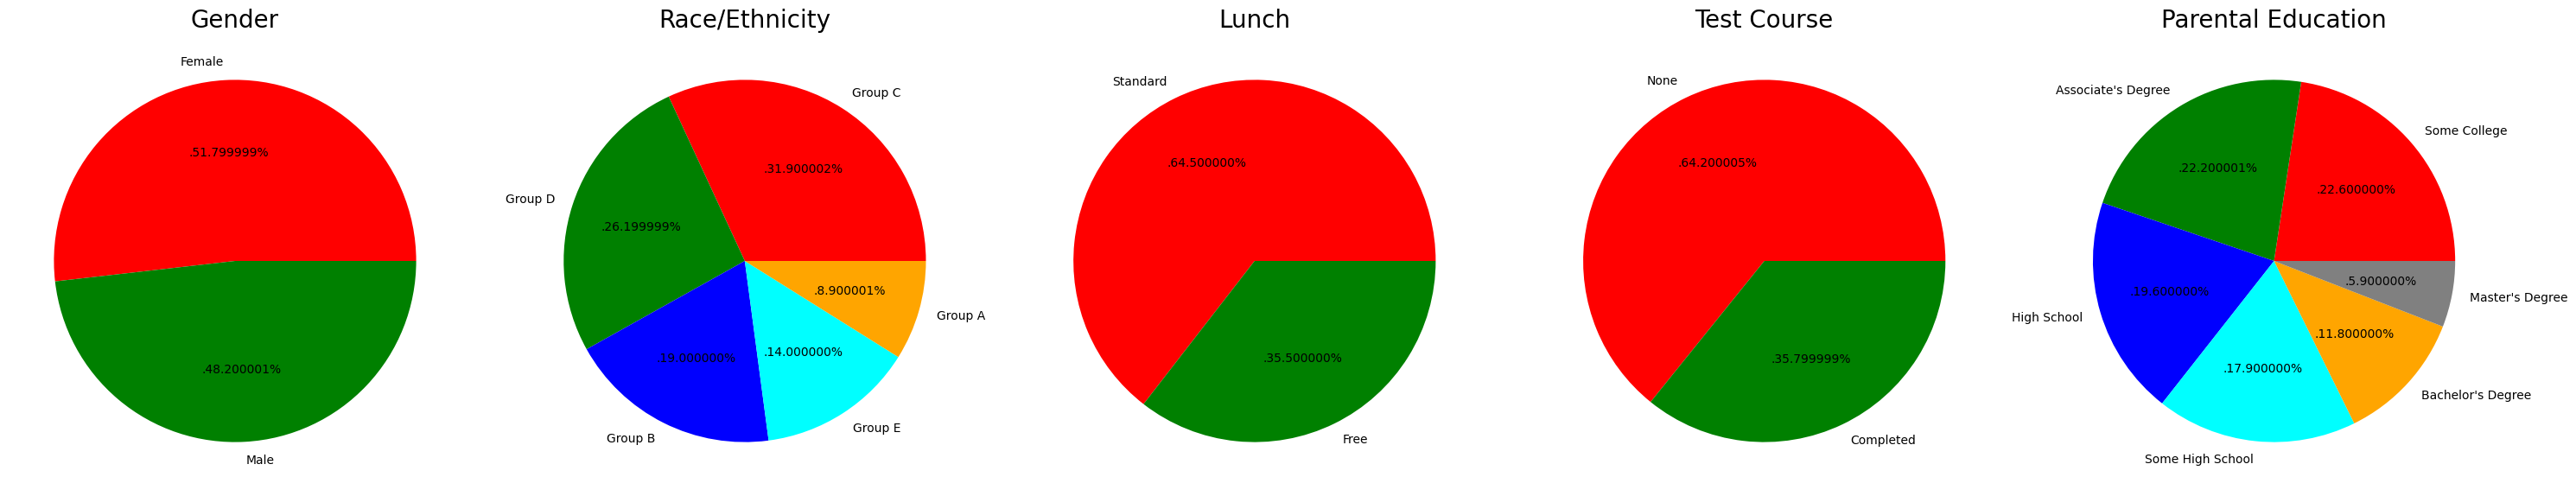

In [40]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

###  Insights  
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### FeatureWise Visualization 

### Gender Column:
1) how is the distribution of gender ?
2) Is gender has any impact on student's performance ?

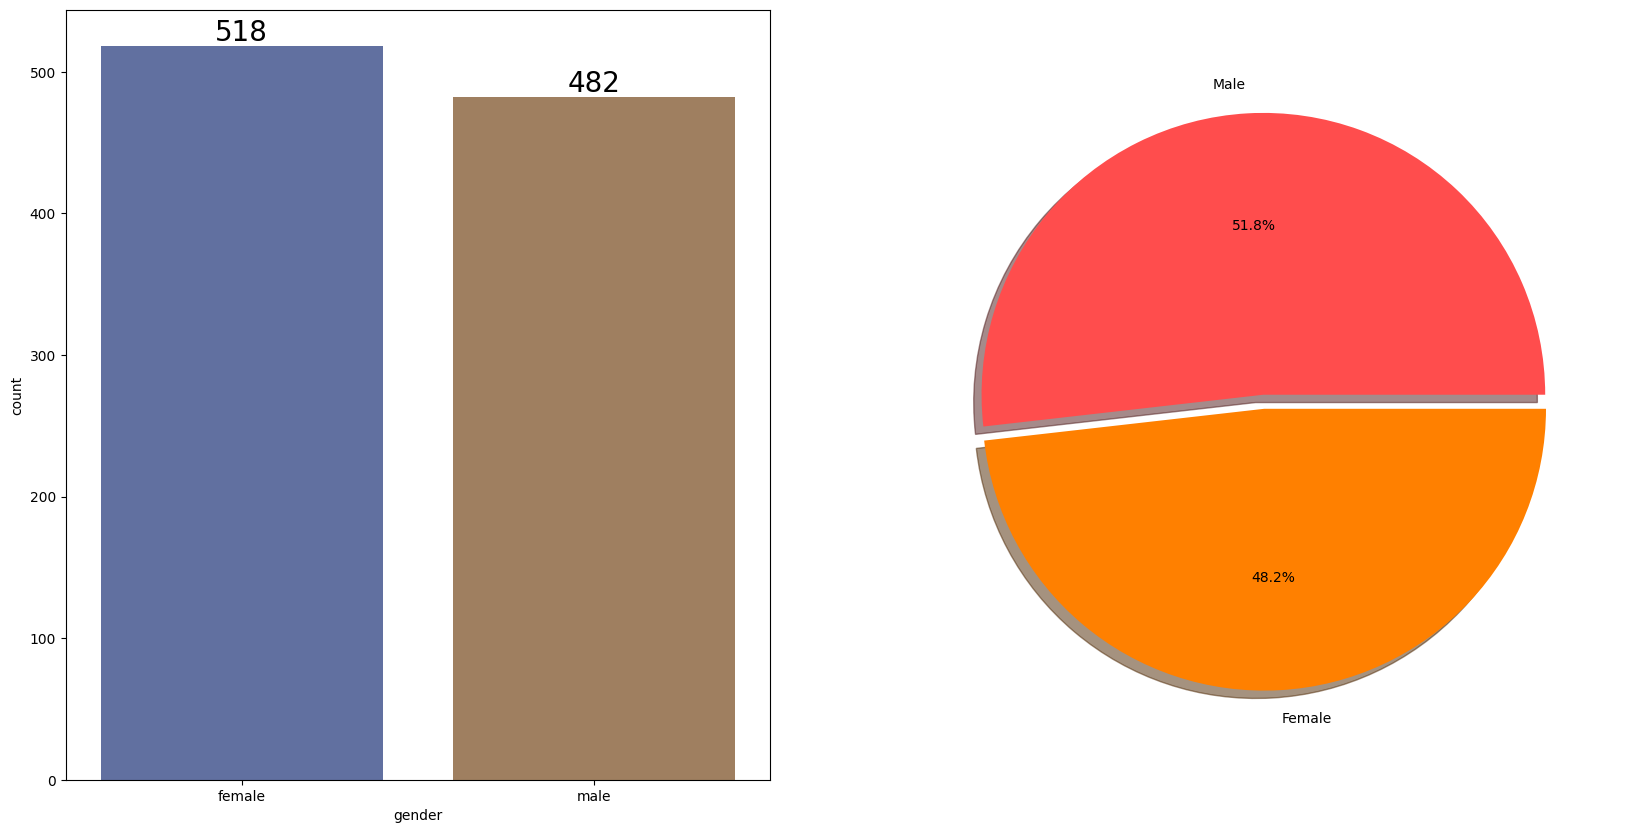

In [49]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.05],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### BiVariate Analysis: 

Does gender has any impact on the average score ?

In [71]:
gender_group = df[['gender','Average_Score','math score']].groupby('gender').mean().reset_index()
print(gender_group.columns)
gender_group


Index(['gender', 'Average_Score', 'math score'], dtype='object')


,gender,Average_Score,math score
0,female,69.569498,63.633205
1,male,65.837483,68.728216


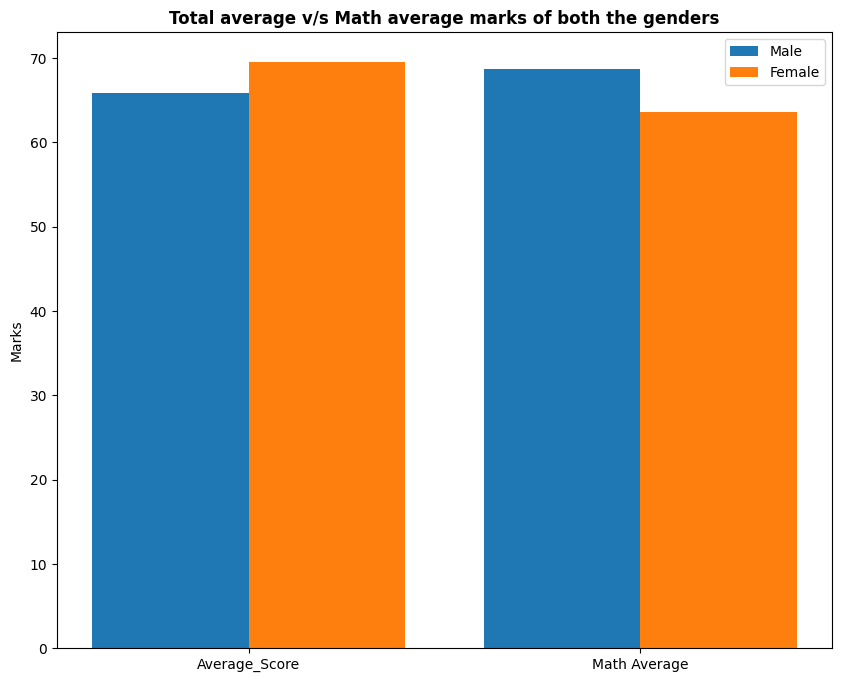

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Average_Score','Math Average']

female_scores = [gender_group.iloc[0]['Average_Score'], gender_group.iloc[0]['math score']]
male_scores = [gender_group.iloc[1]['Average_Score'], gender_group.iloc[1]['math score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

1) On an average females have a better overall score than men.  
2) Males have scored higher in Maths

### Race and Ethinicity:

- How is Group wise distribution ?
- Is Race/Ethinicity has any impact on student's performance ?

### Univariate Analysis

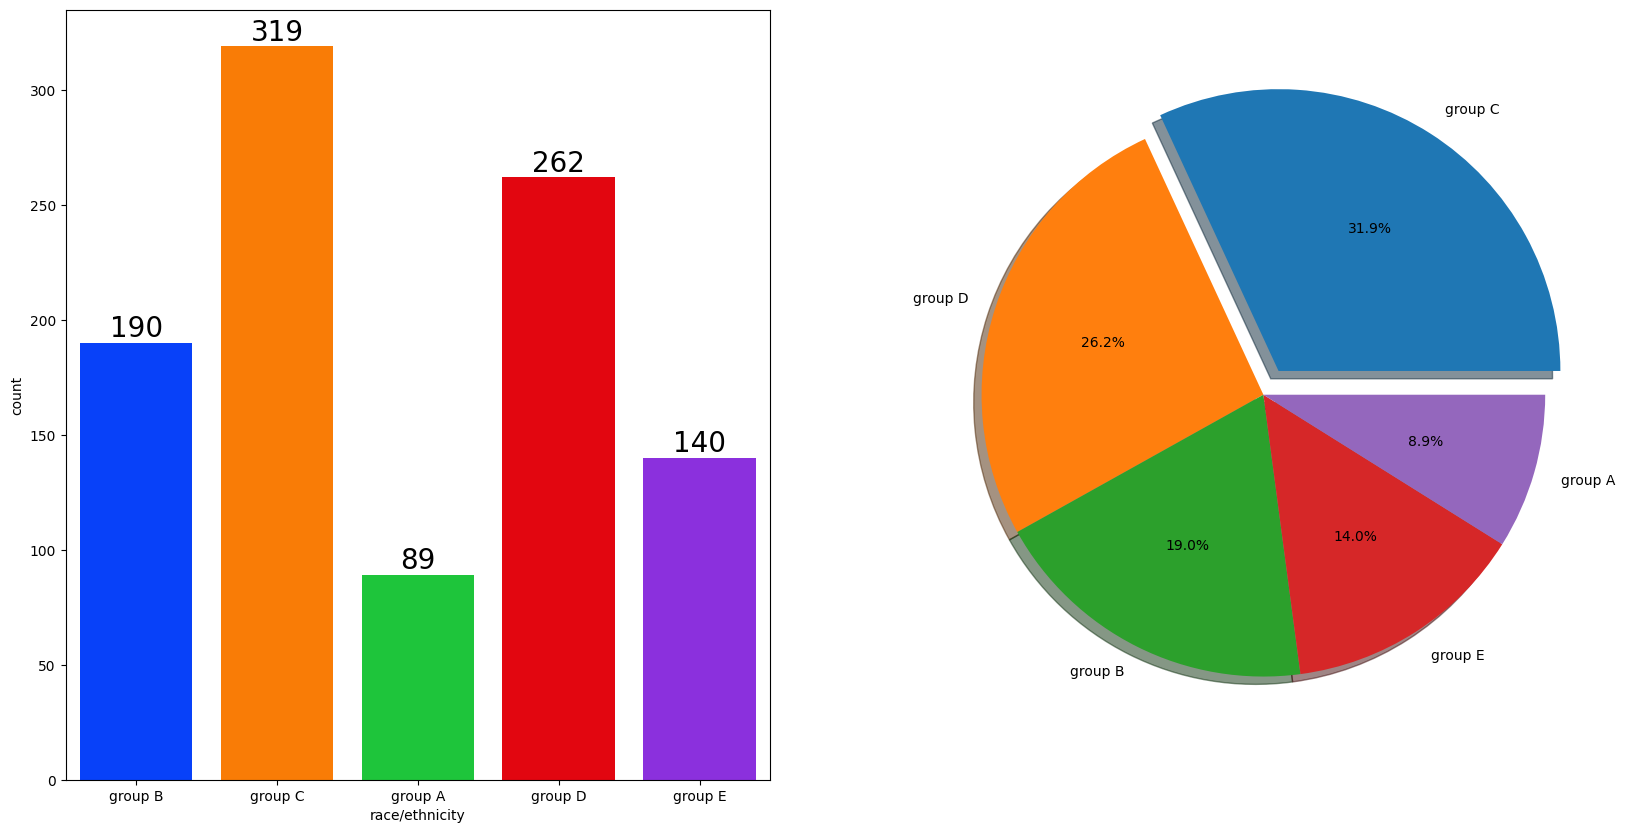

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the students are from Group C,D
- Less number of students belong to Group A

### BiVariate Analysis:
- is the Race/Ethinicity has any impact on the students performance.

In [91]:
# lazy evaluation
data = df.groupby('race/ethnicity')
print(data['math score'].mean().index)
print(data['math score'].mean().values)
print(type(data['math score'].mean()))
data['math score'].mean()

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race/ethnicity')
[61.62921348 63.45263158 64.46394984 67.36259542 73.82142857]
<class 'pandas.core.series.Series'>


race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

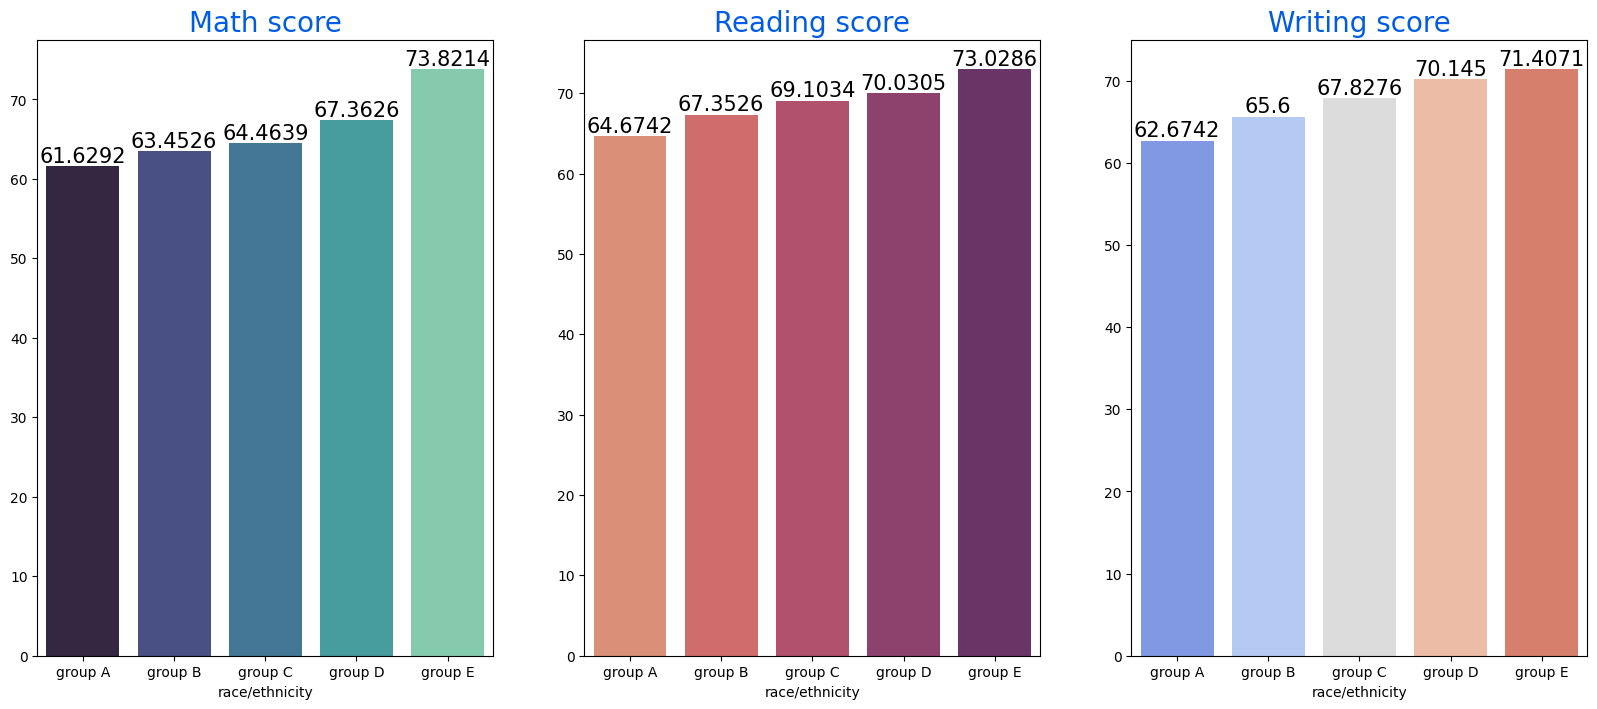

In [79]:
Group_data2=df.groupby('race/ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights: 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 

### Parental Level of education:

1) Whats the education background of parents
2) Does parental education has an impact on students score

### Univariate Analysis:

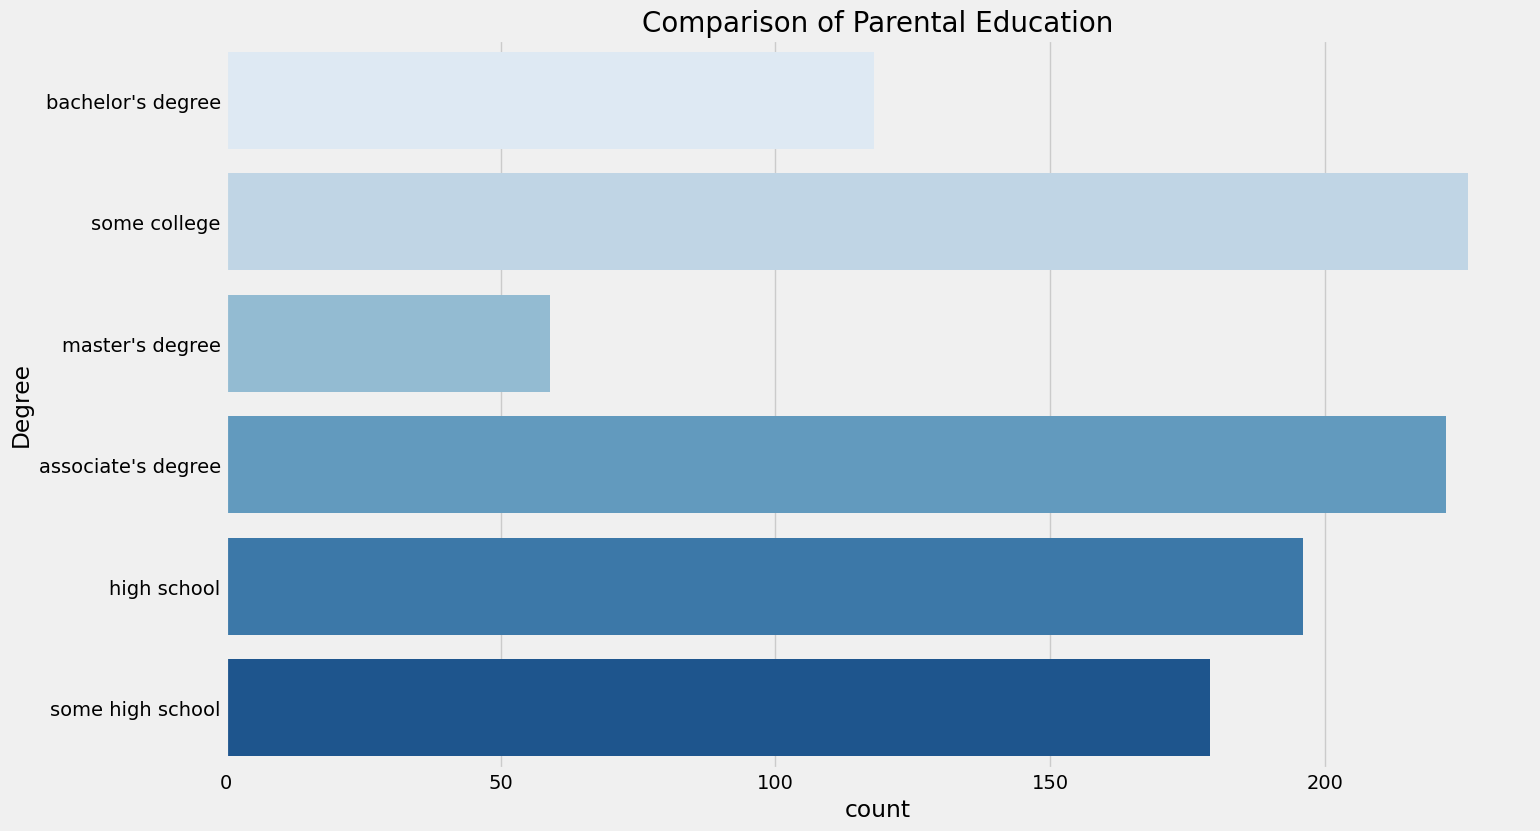

In [93]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.ylabel('Degree')
plt.xlabel('count')
plt.show()

### BiVariate Analysis:

Does Parents education affects childs score ?

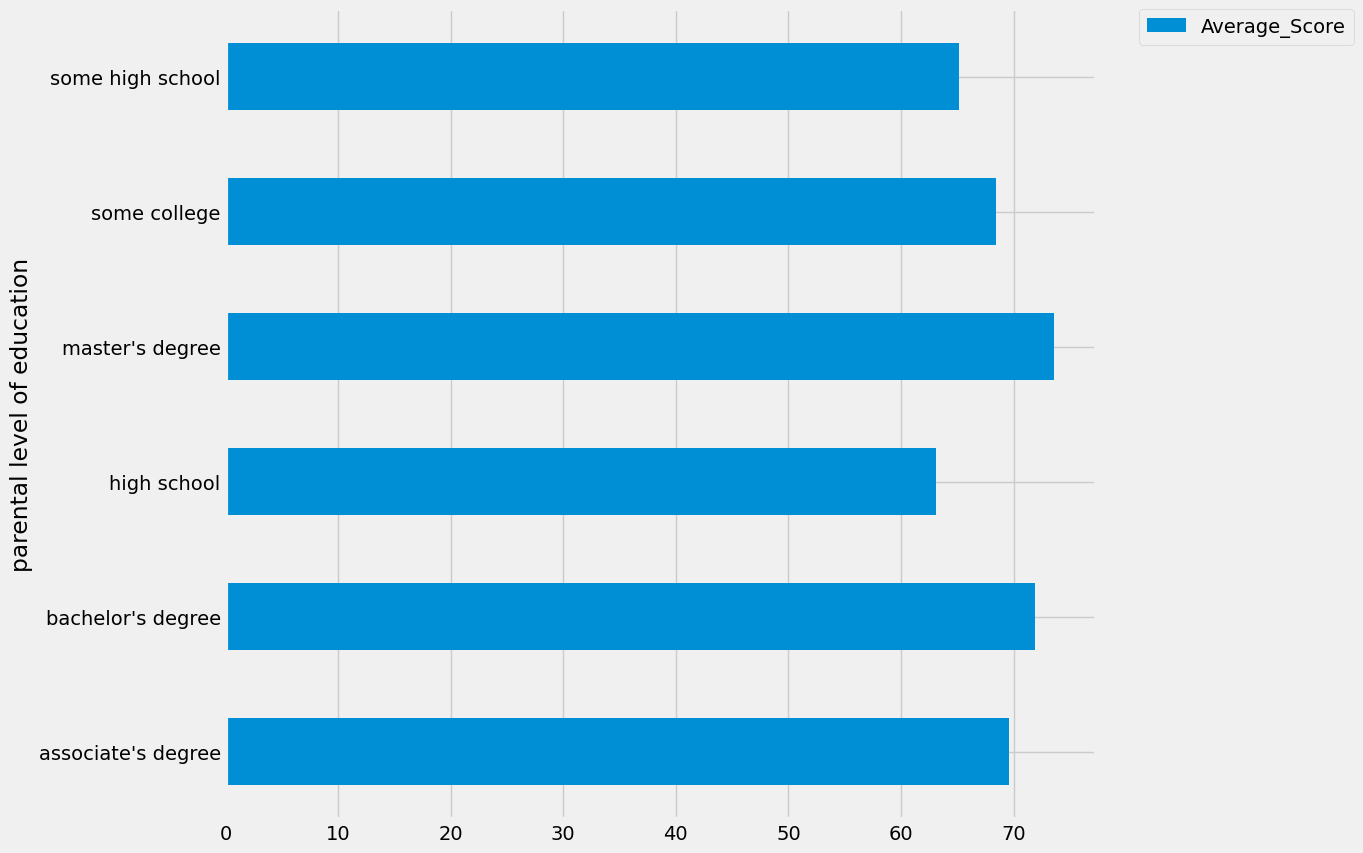

In [98]:
df.groupby('parental level of education')['Average_Score'].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

People who have done masters or bachelors, their children have higher average score.  
And Parents who have just passed from high school, their children have less average score.

### Test Preparation & Lunch

### BiVariate Analysis:

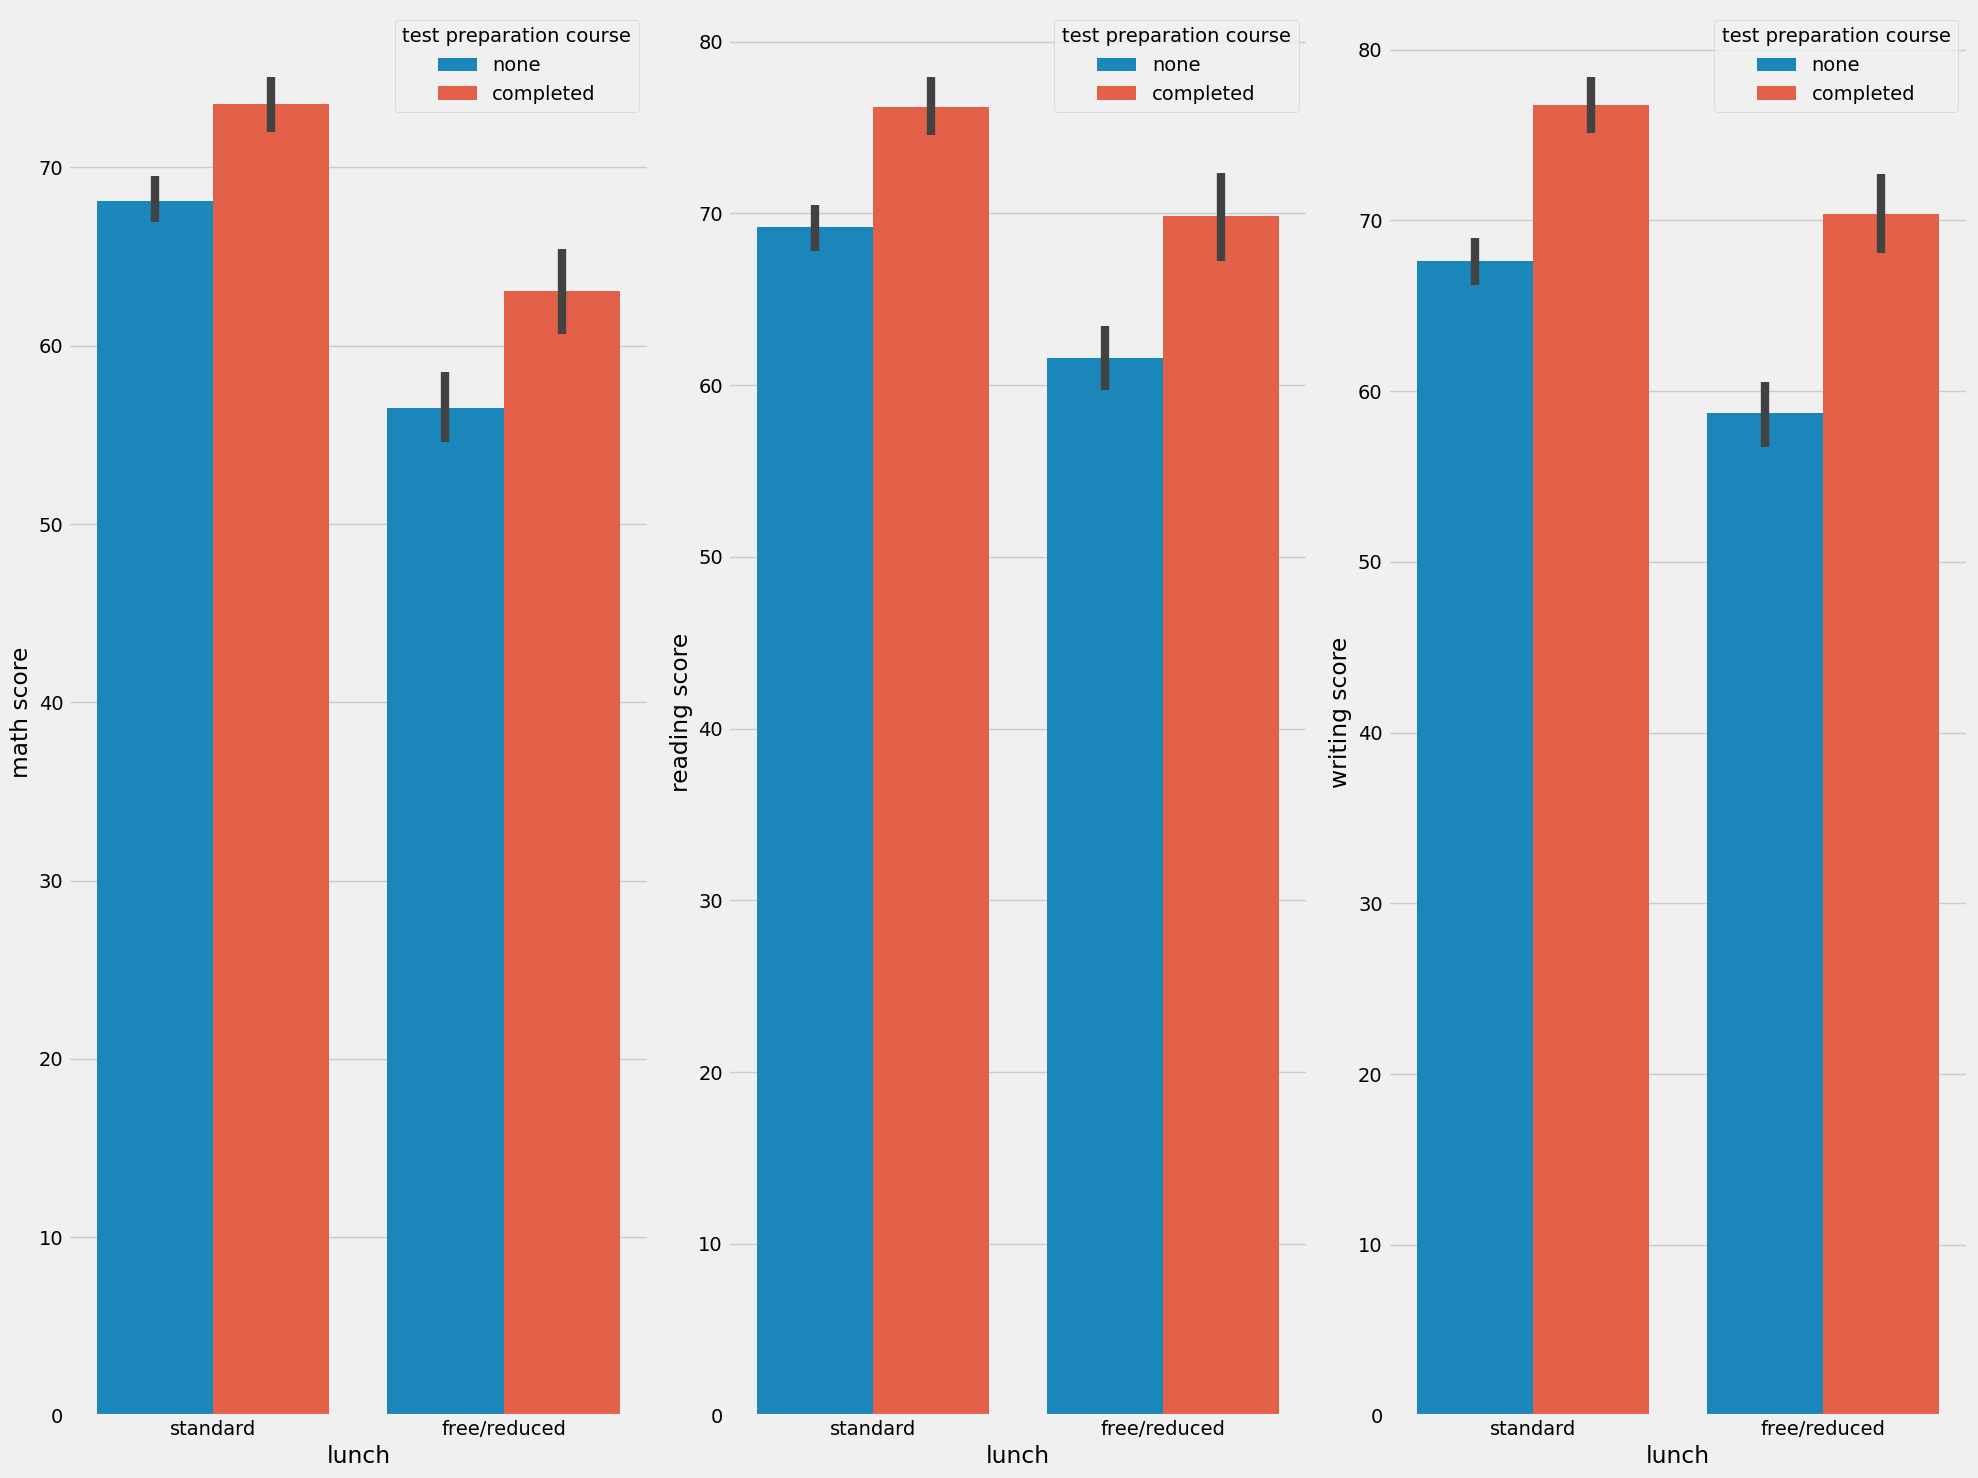

In [103]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.tight_layout()

We observe students who have completed the test preparation and having a standard lunch have higher scores.

### Checking Outliers:

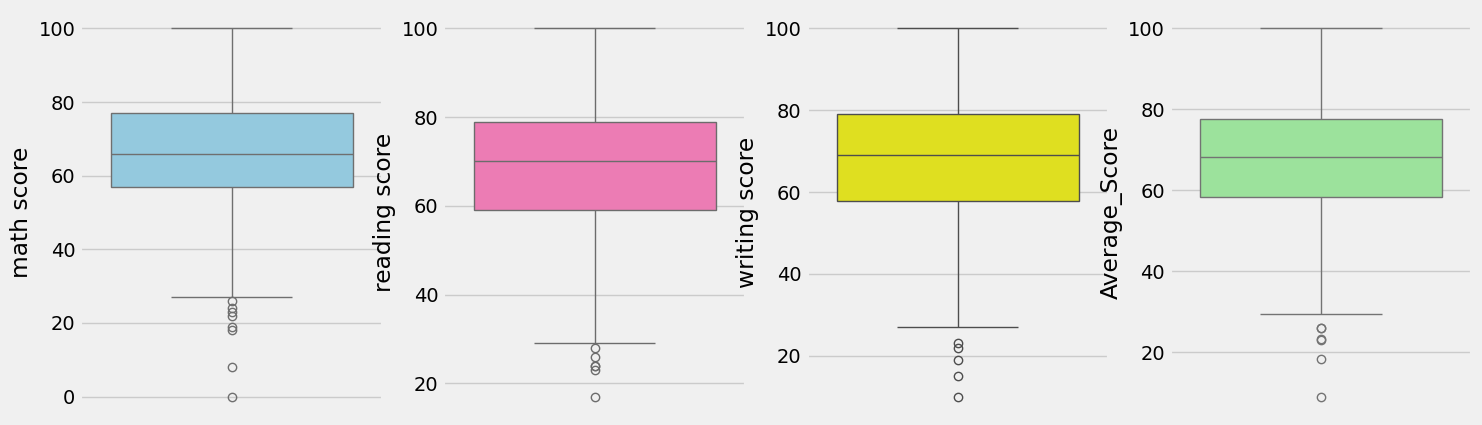

In [96]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_Score'],color='lightgreen')
plt.show()

### MultiVariate Analysis:


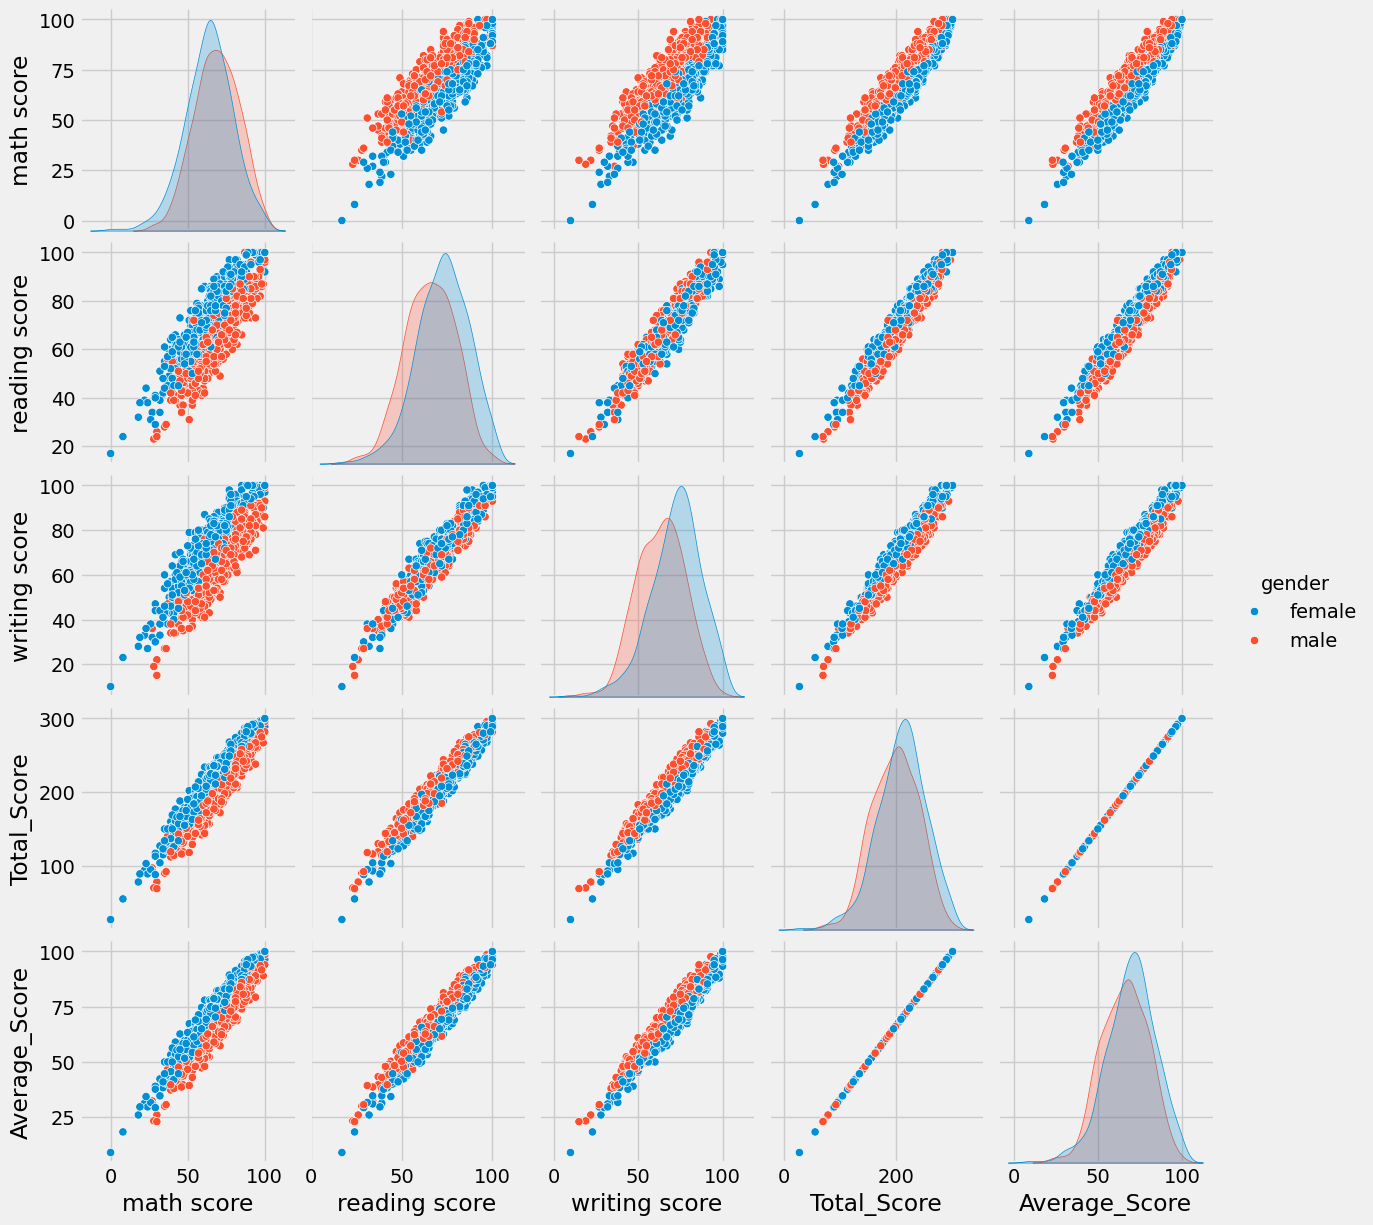

In [97]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Conclusions:
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.